In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
import numpy as np

In [99]:
df=pd.read_csv('train_ctrUa4K.csv')

In [100]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [102]:
df['Credit_History']=df['Credit_History'].astype('object')

In [103]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [104]:
df.dropna(inplace=True)

In [105]:
df.reset_index(drop = True , inplace = True)

In [106]:
df.duplicated().sum()

0

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    object 
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 48.9+ KB


In [108]:
df.drop(['Loan_ID'], inplace=True , axis=1)

In [109]:
df['Gender'].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

In [110]:
df['Married'].value_counts()

Married
Yes    311
No     169
Name: count, dtype: int64

In [111]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('object')

In [112]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [113]:
df['Education'].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [114]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [115]:
df['Loan_Amount_Term'].unique()

array([360.0, 120.0, 180.0, 60.0, 300.0, 480.0, 240.0, 36.0, 84.0],
      dtype=object)

In [116]:
df['Credit_History'].value_counts()

Credit_History
1.0    410
0.0     70
Name: count, dtype: int64

In [117]:
df['Credit_History']=df['Credit_History'].astype('object')

In [118]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [119]:
df['Loan_Status'].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [120]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [121]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417
std,5668.251251,2617.692267,80.508164
min,150.000000,0.000000,9.000000
25%,2898.750000,0.000000,100.000000
50%,3859.000000,1084.500000,128.000000
75%,5852.500000,2253.250000,170.000000
max,81000.000000,33837.000000,600.000000


<Axes: xlabel='LoanAmount'>

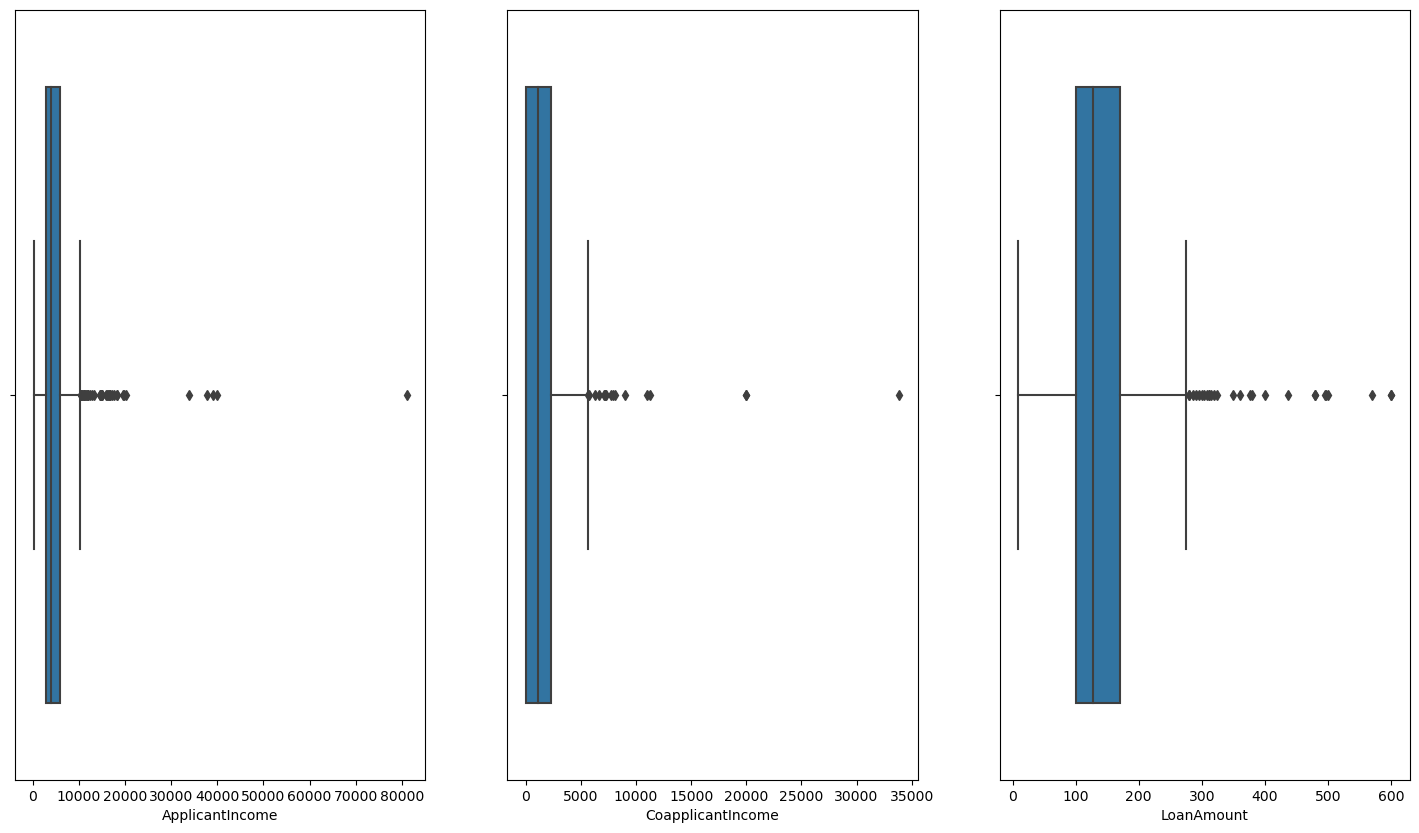

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
sns.boxplot(ax=axes[0], data=df, x='ApplicantIncome')
sns.boxplot(ax=axes[1], data=df, x='CoapplicantIncome')
sns.boxplot(ax=axes[2], data=df, x='LoanAmount')


In [123]:
X = df.drop(columns=["Loan_Status"])  
y = df["Loan_Status"] 

In [124]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

In [125]:
numeric_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]
categorical_features = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]

In [126]:
class CapFloorTransformer:
    def fit(self, X, y=None):
        self.lower_bounds = np.percentile(X, 5, axis=0)
        self.upper_bounds = np.percentile(X, 95, axis=0)
        return self

    def transform(self, X):
        return np.clip(X, self.lower_bounds, self.upper_bounds)

In [127]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('cap_floor', CapFloorTransformer()),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [128]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [129]:
model_scores = {}

for model_name, model in models.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', model)])
    
    scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy')
    model_scores[model_name] = scores.mean()
    print(f"{model_name} Accuracy: {scores.mean():.4f}")

Logistic Regression Accuracy: 0.6896
Random Forest Accuracy: 0.6583
Gradient Boosting Accuracy: 0.6667
Support Vector Classifier Accuracy: 0.6958
K-Nearest Neighbors Accuracy: 0.6396
Decision Tree Accuracy: 0.6333
Naive Bayes Accuracy: 0.6208


In [130]:
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with Accuracy: {model_scores[best_model_name]:.4f}")

final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', best_model)])

final_pipeline.fit(X, y)


Best Model: Support Vector Classifier with Accuracy: 0.6958


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('cap_floor',
                                                                   <__main__.CapFloorTransformer object at 0x00000244B0226A50>),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', SVC())])

In [131]:
import gradio as gr

def predict_loan_status(Gender, Married, Dependents, Education, Self_Employed,
                        ApplicantIncome, CoapplicantIncome, LoanAmount, Property_Area):
    input_data = pd.DataFrame({
        'Gender': [Gender],
        'Married': [Married],
        'Dependents': [Dependents],
        'Education': [Education],
        'Self_Employed': [Self_Employed],
        'ApplicantIncome': [ApplicantIncome],
        'CoapplicantIncome': [CoapplicantIncome],
        'LoanAmount': [LoanAmount],
        'Property_Area': [Property_Area]
    })
    prediction = pipeline.predict(input_data)
    return "Approved" if prediction[0] == "Y" else "Rejected"

interface = gr.Interface(
    fn=predict_loan_status,
    inputs=[
        gr.Dropdown(["Male", "Female"], label="Gender"),
        gr.Dropdown(["Yes", "No"], label="Married"),
        gr.Dropdown(["0", "1", "2", "3+"], label="Dependents"),
        gr.Dropdown(["Graduate", "Not Graduate"], label="Education"),
        gr.Dropdown(["Yes", "No"], label="Self Employed"),
        gr.Number(label="Applicant Income"),
        gr.Number(label="Coapplicant Income"),
        gr.Number(label="Loan Amount"),
        gr.Dropdown(["Urban", "Semiurban", "Rural"], label="Property Area")
    ],
    outputs="text",
    title="Loan Approval Prediction",
    description="Enter the applicant's information to predict loan approval status."
)

interface.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


C:\Users\aaa\anaconda3\Lib\site-packages\gradio\analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.44.0, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(
